In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Now time to look through the data

In [3]:
df = pd.read_excel("datasets/MPS-Arrests.xlsx")

In [4]:
df.head()

,Arrest Year,Arrest Month,Arrest Month Name,Gender,Age Group,Ethnicity (4+1),First Arrest Offnece,Domestic Abuse Flag,Arrest Count
0,2019,1,January,Female,Adult,Asian,Assault,No,10
1,2019,1,January,Female,Adult,Asian,Assault,Yes,22
2,2019,1,January,Female,Adult,Asian,Burglary,No,1
3,2019,1,January,Female,Adult,Asian,Driving,No,8
4,2019,1,January,Female,Adult,Asian,Drugs,No,4


In [5]:
df.shape

(16962, 9)

In [6]:
df.dtypes

Arrest Year              int64
Arrest Month             int64
Arrest Month Name       object
Gender                  object
Age Group               object
Ethnicity (4+1)         object
First Arrest Offnece    object
Domestic Abuse Flag     object
Arrest Count             int64
dtype: object

In [7]:
df.describe()

,Arrest Year,Arrest Month,Arrest Count
count,16962.000000,16962.000000,16962.000000
mean,2021.414043,6.239241,42.306980
std,1.590594,3.519561,128.825701
min,2019.000000,1.000000,1.000000
25%,2020.000000,3.000000,2.000000
50%,2022.000000,6.000000,6.000000
75%,2023.000000,9.000000,28.000000
max,2024.000000,12.000000,2559.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16962 entries, 0 to 16961
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Arrest Year           16962 non-null  int64 
 1   Arrest Month          16962 non-null  int64 
 2   Arrest Month Name     16962 non-null  object
 3   Gender                16962 non-null  object
 4   Age Group             16962 non-null  object
 5   Ethnicity (4+1)       16962 non-null  object
 6   First Arrest Offnece  16962 non-null  object
 7   Domestic Abuse Flag   16962 non-null  object
 8   Arrest Count          16962 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


Now that we have some basic info, I will know clean up the dataset for any empty data

In [9]:
df.dropna(inplace=True)
df.describe()

,Arrest Year,Arrest Month,Arrest Count
count,16962.000000,16962.000000,16962.000000
mean,2021.414043,6.239241,42.306980
std,1.590594,3.519561,128.825701
min,2019.000000,1.000000,1.000000
25%,2020.000000,3.000000,2.000000
50%,2022.000000,6.000000,6.000000
75%,2023.000000,9.000000,28.000000
max,2024.000000,12.000000,2559.000000


In [10]:
df.head()

,Arrest Year,Arrest Month,Arrest Month Name,Gender,Age Group,Ethnicity (4+1),First Arrest Offnece,Domestic Abuse Flag,Arrest Count
0,2019,1,January,Female,Adult,Asian,Assault,No,10
1,2019,1,January,Female,Adult,Asian,Assault,Yes,22
2,2019,1,January,Female,Adult,Asian,Burglary,No,1
3,2019,1,January,Female,Adult,Asian,Driving,No,8
4,2019,1,January,Female,Adult,Asian,Drugs,No,4


Now to create a line graph

We first have to look at the total number of arrests made throughout 2019 - 2023. 2024 has been excluded since we will only be working in 12 month spans and as of writing the dataset only goes to April 2024

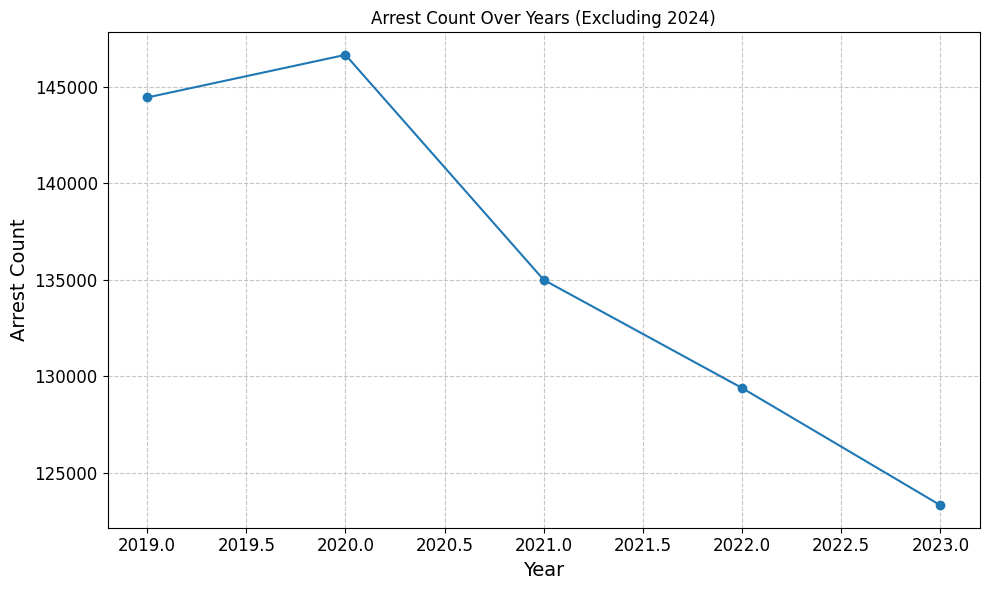

In [11]:
# Filter out data for the year 2024
df_filtered = df[df['Arrest Year'] != 2024]

# Group filtered data by arrest year and calculate the sum of arrest counts
arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Plot the data
plt.figure(figsize=(10, 6))  # Adjust the figure size

plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-')

# Customize the plot
plt.title('Arrest Count Over Years (Excluding 2024)')
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with transparency
plt.tight_layout() 

# Show the plot
plt.show()

I will be looking into 5 types of crime and analysing it.

These are:

    Murder

    Drugs

    Assault

    Burglary
    
    Immigration
    
I will also be looking at different Genders and ethnicity's throughout this analysis.

Lets first take a look into the different types of crime throughout the years


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    2919
2020    3466
2021    3621
2022    3478
2023     633
Name: Arrest Count, dtype: int64

Total count of murders (excluding 2024): 14117


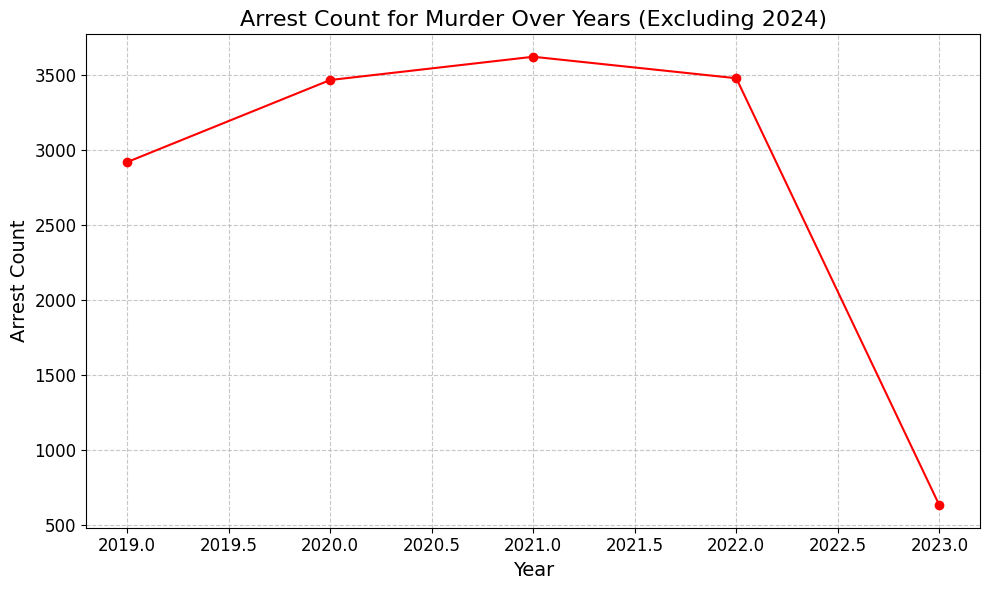

In [12]:
# Filter the DataFrame to include only the data where the "First Arrest Offnece" is "Murder" and exclude the year 2024
df_filtered = df[(df['First Arrest Offnece'] == 'Murder') & (df['Arrest Year'] != 2024)]

# Group the filtered data by arrest year and calculate the sum of arrest counts
arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Print the grouped data for verification
print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

# Print the total count of murders
total_murders = arrests_per_year.sum()
print(f"\nTotal count of murders (excluding 2024): {total_murders}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="red")

# Customize the plot
plt.title('Arrest Count for Murder Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with transparency
plt.tight_layout() 

# Show the plot
plt.show()


We can clearly see that there is a big decline in arrests linked to murder in London with about 179 arrests in 2023.


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    17892
2020    20238
2021    16001
2022    13863
2023    10488
Name: Arrest Count, dtype: int64

Total count of drugs (excluding 2024): 78482


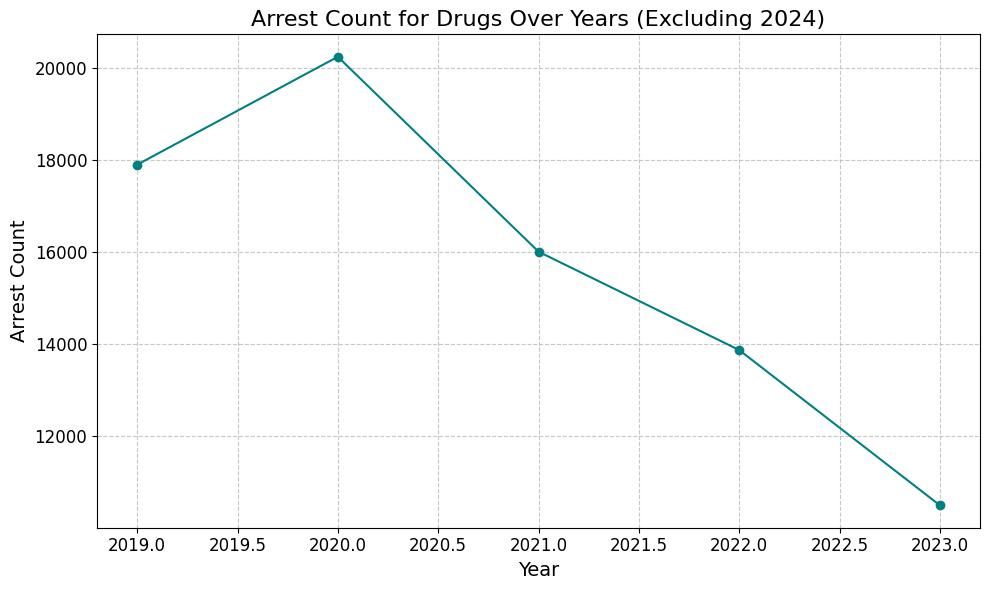

In [13]:
# Filter the DataFrame to include only the data where the "First Arrest Offnece" is "drugs" and exclude the year 2024
df_filtered = df[(df['First Arrest Offnece'] == 'Drugs') & (df['Arrest Year'] != 2024)]

# Group the filtered data by arrest year and calculate the sum of arrest counts
arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Print the grouped data for verification
print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

# Print the total count of drugs
total_drugs = arrests_per_year.sum()
print(f"\nTotal count of drugs (excluding 2024): {total_drugs}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="teal")

# Customise the plot
plt.title('Arrest Count for Drugs Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 

plt.show()


With the drugs count we can see that the number of arrests is at an all time high


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    22957
2020    24068
2021    23587
2022    21834
2023    25498
Name: Arrest Count, dtype: int64

Total count of Assault (excluding 2024): 117944


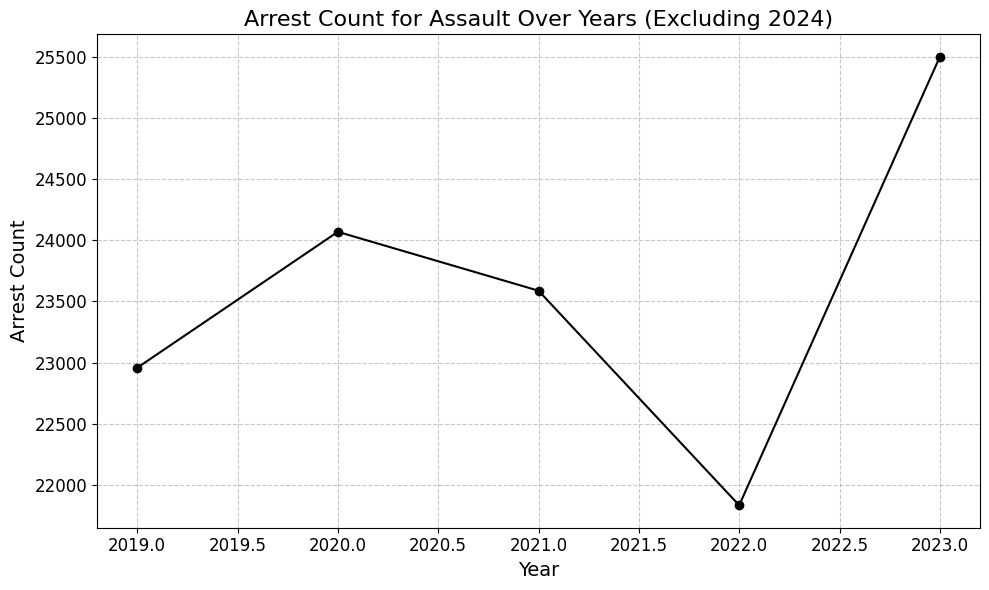

In [14]:
# Filter the DataFrame to include only the data where the "First Arrest Offnece" is "Assault" and exclude the year 2024
df_filtered = df[(df['First Arrest Offnece'] == 'Assault') & (df['Arrest Year'] != 2024)]

# Group the filtered data by arrest year and calculate the sum of arrest counts
arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Print the grouped data for verification
print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

# Print the total count of Assault
total_assault = arrests_per_year.sum()
print(f"\nTotal count of Assault (excluding 2024): {total_assault}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="black")

# Customise the plot
plt.title('Arrest Count for Assault Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 

plt.show()

Again like the drugs arrest count, the arrested linked to assault are also at an all time high


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    4227
2020    4138
2021    3264
2022    3522
2023    4073
Name: Arrest Count, dtype: int64

Total count of Burglary (excluding 2024): 19224


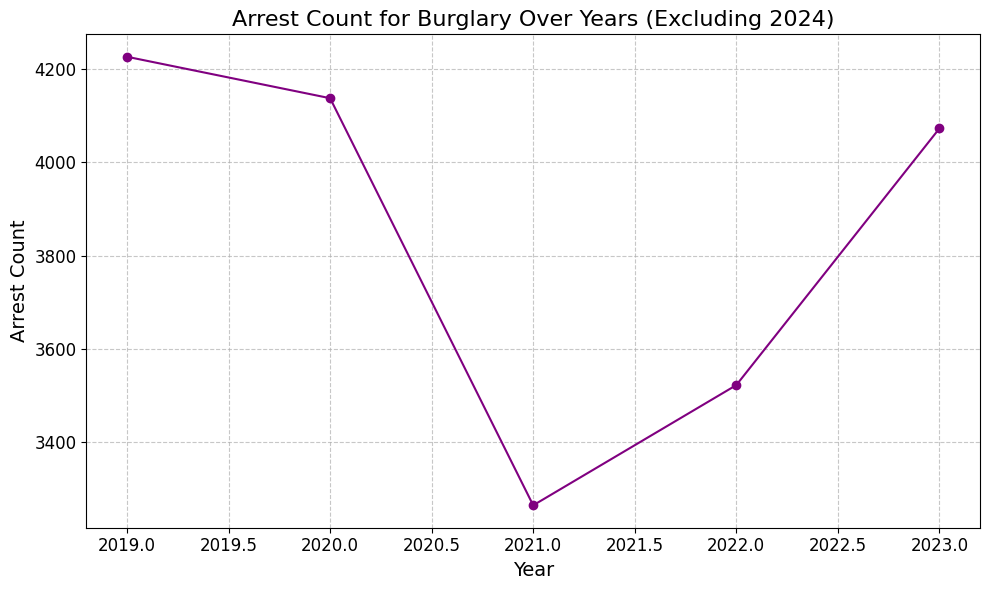

In [15]:
# Filter the DataFrame to include only the data where the "First Arrest Offnece" is "Burglary" and exclude the year 2024
df_filtered = df[(df['First Arrest Offnece'] == 'Burglary') & (df['Arrest Year'] != 2024)]

# Group the filtered data by arrest year and calculate the sum of arrest counts
arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Print the grouped data for verification
print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

# Print the total count of Burglary
total_burglary = arrests_per_year.sum()
print(f"\nTotal count of Burglary (excluding 2024): {total_burglary}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="purple")

# Customise the plot
plt.title('Arrest Count for Burglary Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 

plt.show()

Again the arrest count for burglary is at record highs


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    2964
2020    2085
2021    2063
2022    2146
2023    3691
Name: Arrest Count, dtype: int64

Total count of Immigration (excluding 2024): 12949


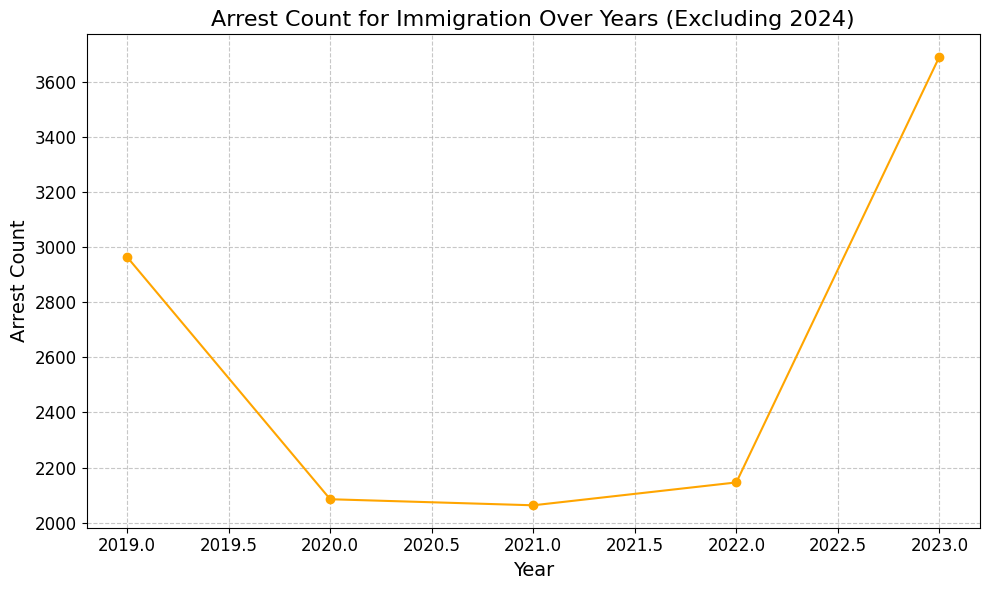

In [16]:
# Filter the DataFrame to include only the data where the "First Arrest Offnece" is "Immigration" and exclude the year 2024
df_filtered = df[(df['First Arrest Offnece'] == 'Immigration') & (df['Arrest Year'] != 2024)]

# Group the filtered data by arrest year and calculate the sum of arrest counts
arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Print the grouped data for verification
print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

# Print the total count of Immigration
total_immigration = arrests_per_year.sum()
print(f"\nTotal count of Immigration (excluding 2024): {total_immigration}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="orange")

# Customise the plot
plt.title('Arrest Count for Immigration Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 

plt.show()

As we can see with all these graphs, every crime type has increased between 2022 - 2023 except for Murder.

Now lets take a deeper dive into each type of crime

I will be analysing each crime type with their gender roles and comparing the two

Male Arrests per Year:
Arrest Year
2019    124656
2020    127619
2021    116557
2022    111741
2023    105702
Name: Arrest Count, dtype: int64

Female Arrests per Year:
Arrest Year
2019    19786
2020    19035
2021    18433
2022    17332
2023    16240
Name: Arrest Count, dtype: int64


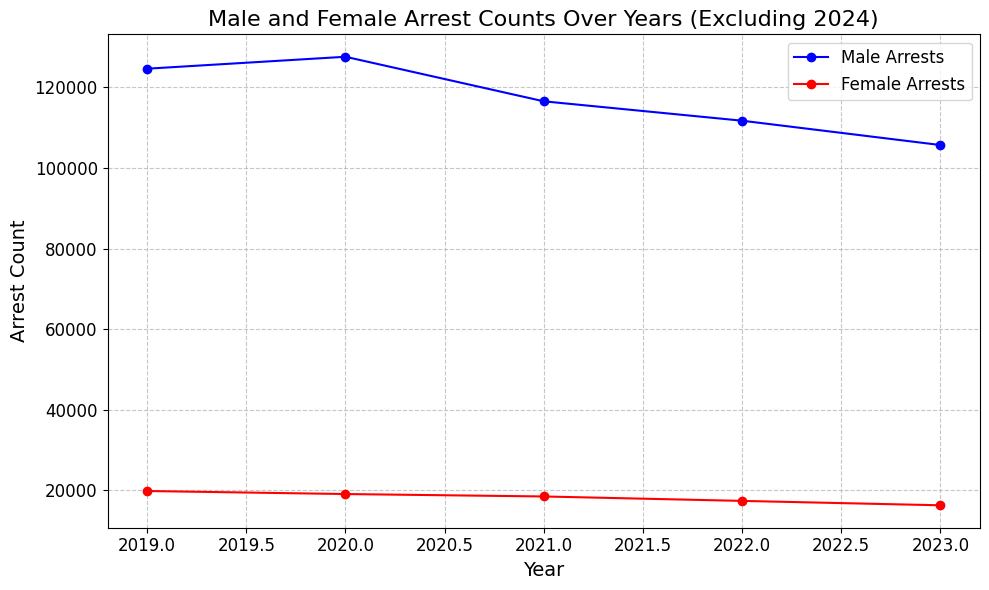

In [17]:
# Filter the DataFrame to include only the data where the "Gender" is "Male" and exclude the year 2024
male_df_filtered = df[(df['Gender'] == 'Male') & (df['Arrest Year'] != 2024)]
# Group the filtered data by arrest year and calculate the sum of arrest counts for males
male_arrests_per_year = male_df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Filter the DataFrame to include only the data where the "Gender" is "Female" and exclude the year 2024
female_df_filtered = df[(df['Gender'] == 'Female') & (df['Arrest Year'] != 2024)]
# Group the filtered data by arrest year and calculate the sum of arrest counts for females
female_arrests_per_year = female_df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Print the grouped data for verification
print("Male Arrests per Year:")
print(male_arrests_per_year)
print("\nFemale Arrests per Year:")
print(female_arrests_per_year)

plt.figure(figsize=(10, 6))

# Plot the data for male arrests
plt.plot(male_arrests_per_year.index, male_arrests_per_year.values, marker='o', linestyle='-', color='b', label='Male Arrests')
# Plot the data for female arrests
plt.plot(female_arrests_per_year.index, female_arrests_per_year.values, marker='o', linestyle='-', color='r', label='Female Arrests')

# Customize the plot
plt.title('Male and Female Arrest Counts Over Years (Excluding 2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Arrest Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)  # Add legend to differentiate between male and female arrest counts
plt.tight_layout()

# Show the plot
plt.show()


Here we can see that there are much less female arrests over male arrests

Now lets dive deeper into each ethnicity of each gender.

I will be analysing 3 ethnicity's.

These are Asian, White and Black. I will be doing this for both genders.


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    262
2020    364
2021    391
2022    418
2023     61
Name: Arrest Count, dtype: int64

Total count of murders committed by females (excluding 2024): 1496


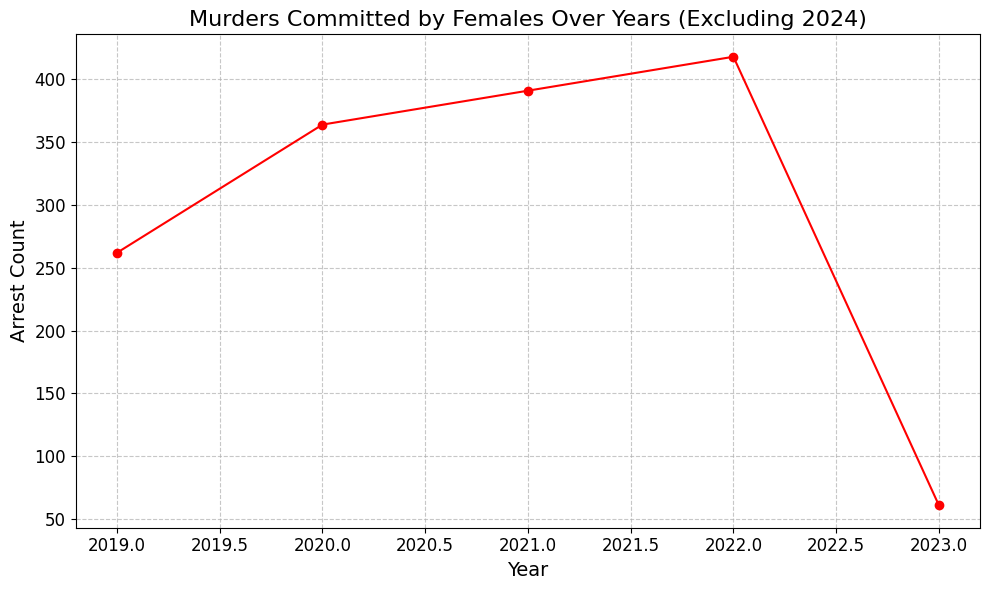

In [18]:
# Filter the DataFrame to include only the data where the "Gender" is "Female", offense is "Murder", and exclude the year 2024
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Murder")]

# Group the filtered data by arrest year and sum the 'Arrest Count' for each year
arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Verify the grouped data
print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

# Print the total count of murders committed by females
total_female_murders = arrests_per_year.sum()
print(f"\nTotal count of murders committed by females (excluding 2024): {total_female_murders}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

# Customize the plot
plt.title('Murders Committed by Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

We can see that a total of 1496 arrests linked to murder where caused by women


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    43
2020    42
2021    57
2022    62
2023     5
Name: Arrest Count, dtype: int64

Total count of murders committed by asian females (excluding 2024): 209


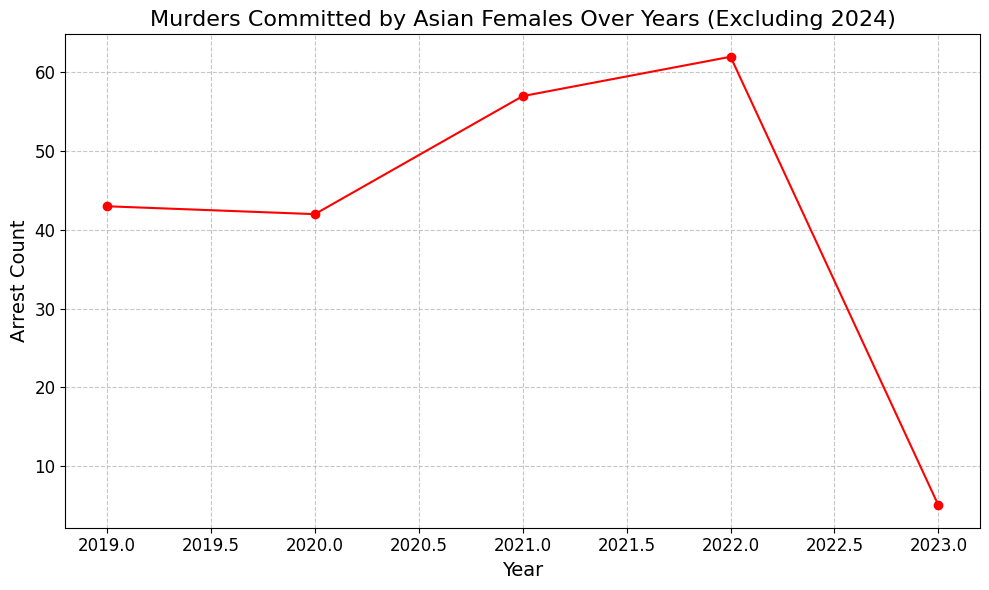

In [19]:
# Filter the DataFrame to include only the data where the "Gender" is "Female", offense is "Murder", and exclude the year 2024
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Murder") & (df["Ethnicity (4+1)"] == "Asian")]

# Group the filtered data by arrest year and sum the 'Arrest Count' for each year
arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Verify the grouped data
print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

# Print the total count of murders committed by females
total_female_murders = arrests_per_year.sum()
print(f"\nTotal count of murders committed by asian females (excluding 2024): {total_female_murders}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

# Customize the plot
plt.title('Murders Committed by Asian Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

209 of those female arrests where from Asian women


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    121
2020    183
2021    197
2022    206
2023     22
Name: Arrest Count, dtype: int64

Total count of murders committed by white females (excluding 2024): 729


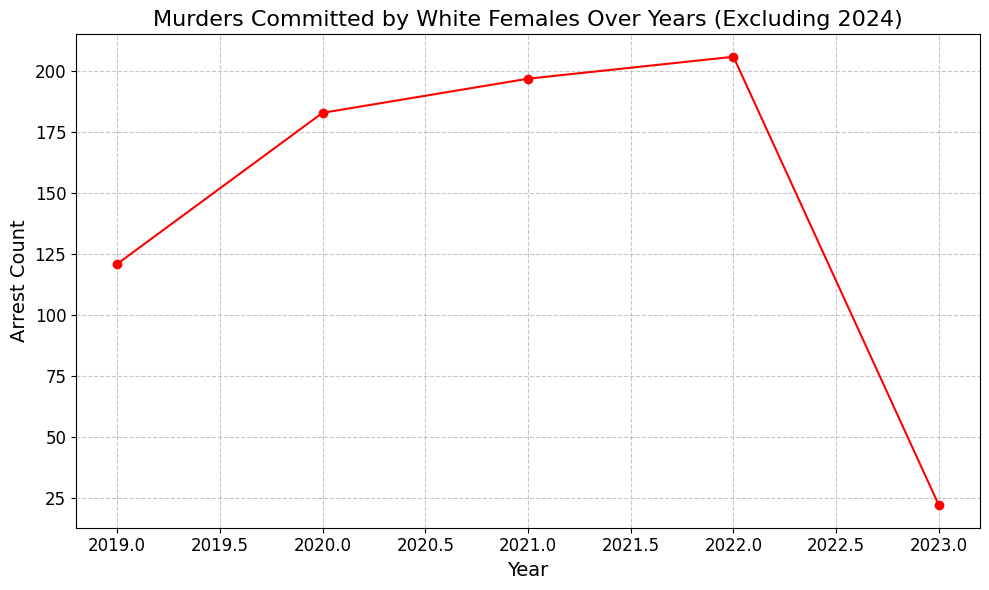

In [20]:
# Filter the DataFrame to include only the data where the "Gender" is "Female", offense is "Murder", and exclude the year 2024
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Murder") & (df["Ethnicity (4+1)"] == "White")]

# Group the filtered data by arrest year and sum the 'Arrest Count' for each year
arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Verify the grouped data
print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

# Print the total count of murders committed by females
total_female_murders = arrests_per_year.sum()
print(f"\nTotal count of murders committed by white females (excluding 2024): {total_female_murders}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

# Customize the plot
plt.title('Murders Committed by White Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

Although on a big downtrend, 729 arrests are so far the greatest number of arrests linked to murder


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019     90
2020    129
2021    125
2022    133
2023     16
Name: Arrest Count, dtype: int64

Total count of murders committed by black females (excluding 2024): 493


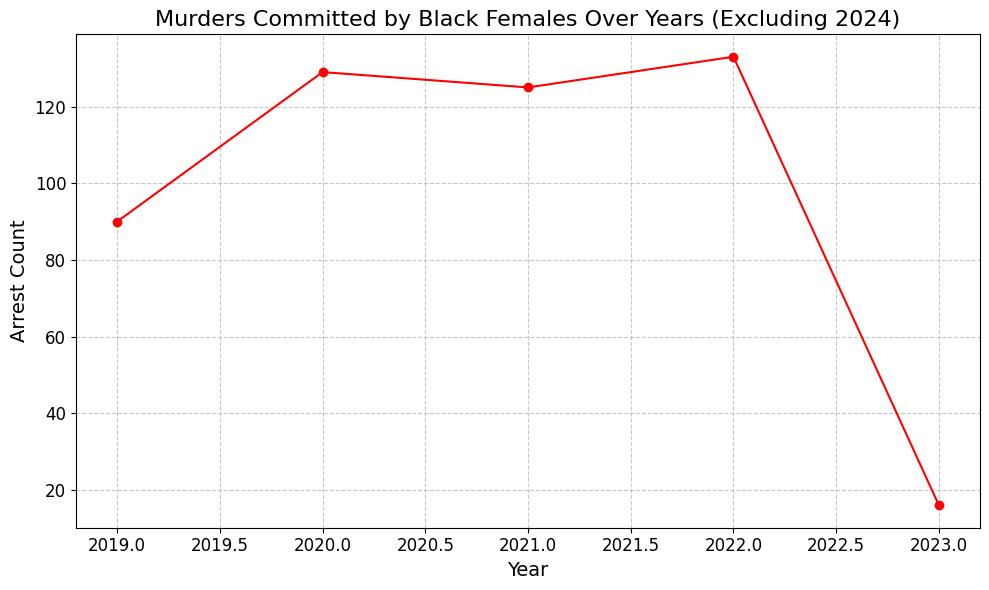

In [21]:
# Filter the DataFrame to include only the data where the "Gender" is "Female", offense is "Murder", and exclude the year 2024
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Murder") & (df["Ethnicity (4+1)"] == "Black")]

# Group the filtered data by arrest year and sum the 'Arrest Count' for each year
arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Verify the grouped data
print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

# Print the total count of murders committed by females
total_female_murders = arrests_per_year.sum()
print(f"\nTotal count of murders committed by black females (excluding 2024): {total_female_murders}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

# Customize the plot
plt.title('Murders Committed by Black Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

We can see that black female murders are also on a decline with 493 in total and only 16 in 2023

Now lets take a look at other crimes


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    1270
2020    1450
2021    1234
2022    1052
2023     924
Name: Arrest Count, dtype: int64

Total count of drug related crimes committed by females (excluding 2024): 5930


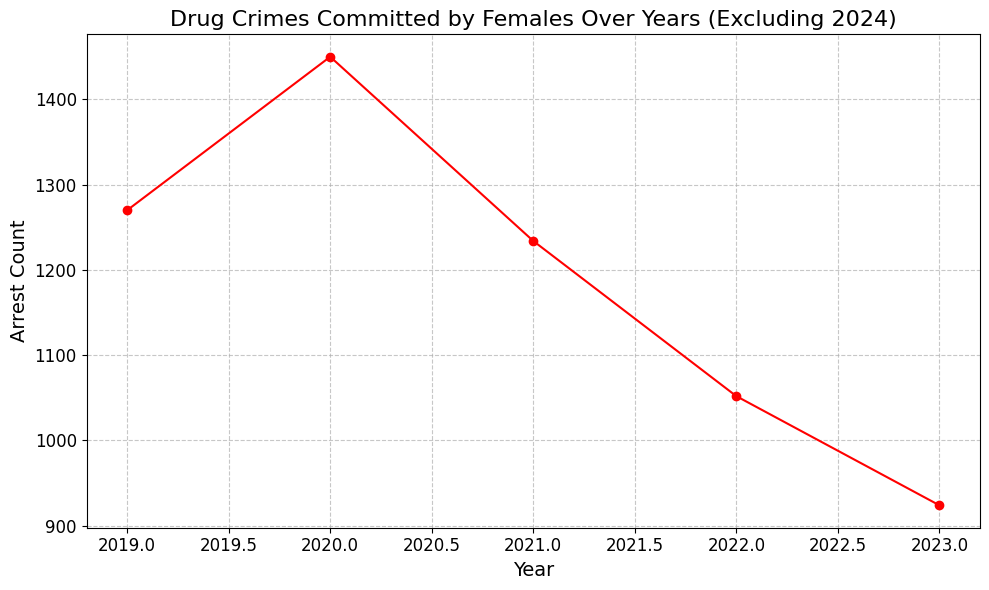

In [22]:
# Filter the DataFrame to include only the data where the "Gender" is "Female", offense is "Murder", and exclude the year 2024
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Drugs")]

# Group the filtered data by arrest year and sum the 'Arrest Count' for each year
arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

# Verify the grouped data
print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

# Print the total count of murders committed by females
total_female_murders = arrests_per_year.sum()
print(f"\nTotal count of drug related crimes committed by females (excluding 2024): {total_female_murders}")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

# Customize the plot
plt.title('Drug Crimes Committed by Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

Here we can again see a overall downtrend in the amount of arrests


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    124
2020    143
2021    130
2022     84
2023     59
Name: Arrest Count, dtype: int64

Total count of drugs committed by asian females (excluding 2024): 540


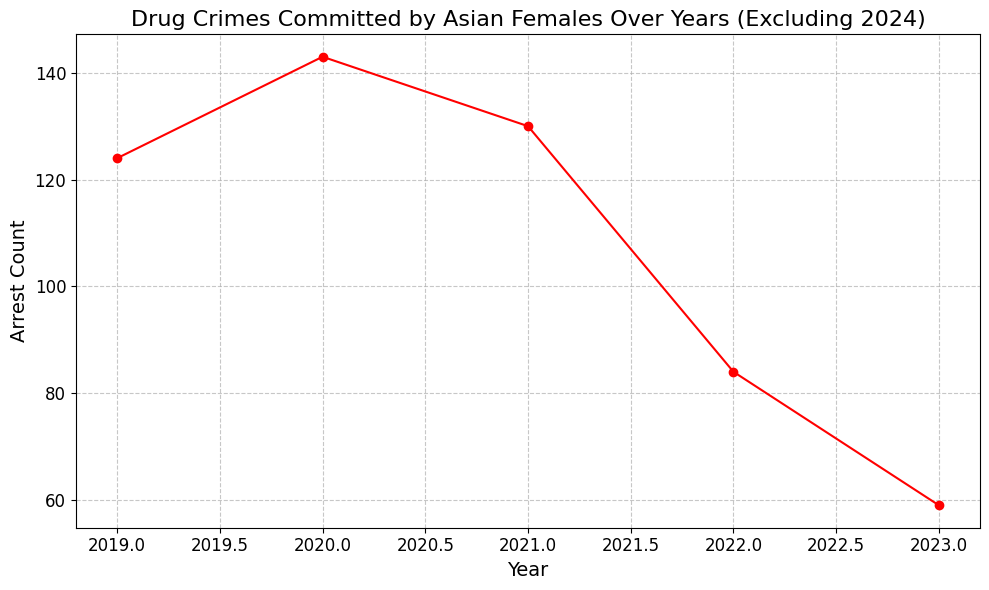

In [23]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Drugs") & (df["Ethnicity (4+1)"] == "Asian")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_arrests = arrests_per_year.sum()
print(f"\nTotal count of drugs committed by asian females (excluding 2024): {total_female_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Drug Crimes Committed by Asian Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    761
2020    889
2021    720
2022    621
2023    456
Name: Arrest Count, dtype: int64

Total count of drugs committed by white females (excluding 2024): 3447


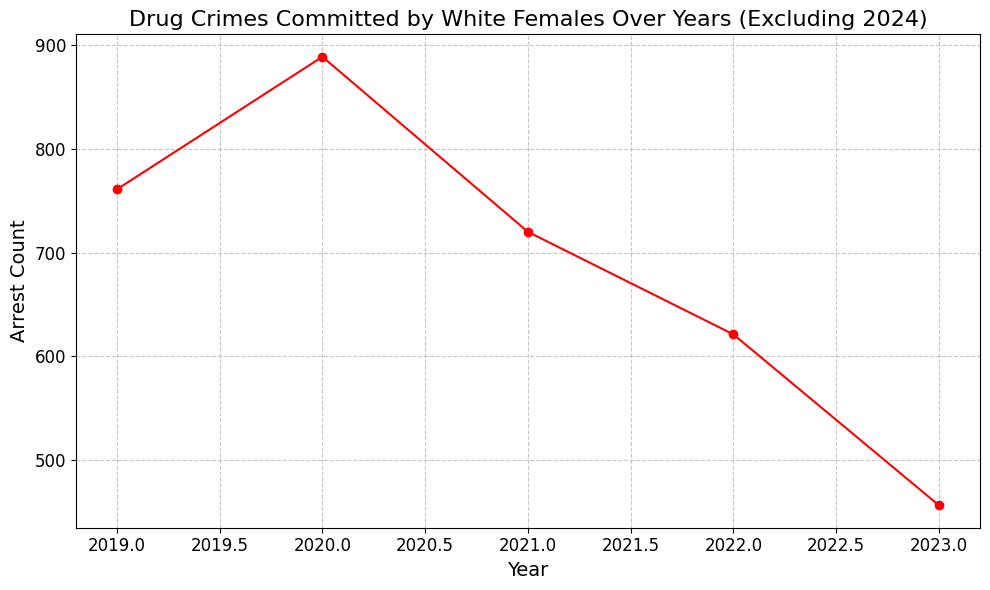

In [24]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Drugs") & (df["Ethnicity (4+1)"] == "White")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_arrests = arrests_per_year.sum()
print(f"\nTotal count of drugs committed by white females (excluding 2024): {total_female_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Drug Crimes Committed by White Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    359
2020    372
2021    343
2022    302
2023    242
Name: Arrest Count, dtype: int64

Total count of drugs committed by black females (excluding 2024): 1618


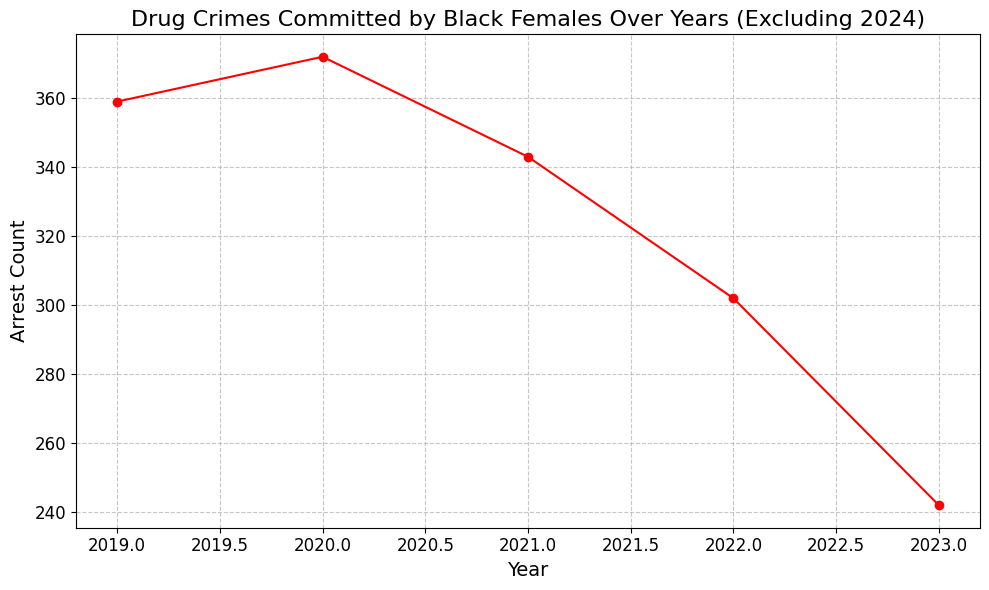

In [25]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Drugs") & (df["Ethnicity (4+1)"] == "Black")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_arrests = arrests_per_year.sum()
print(f"\nTotal count of drugs committed by black females (excluding 2024): {total_female_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Drug Crimes Committed by Black Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

We can see that there is also a big decline in overall drug related crimes committed by females of any race


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    3983
2020    4431
2021    4476
2022    4106
2023    4726
Name: Arrest Count, dtype: int64

Total count of assault related crimes committed by females (excluding 2024): 21722


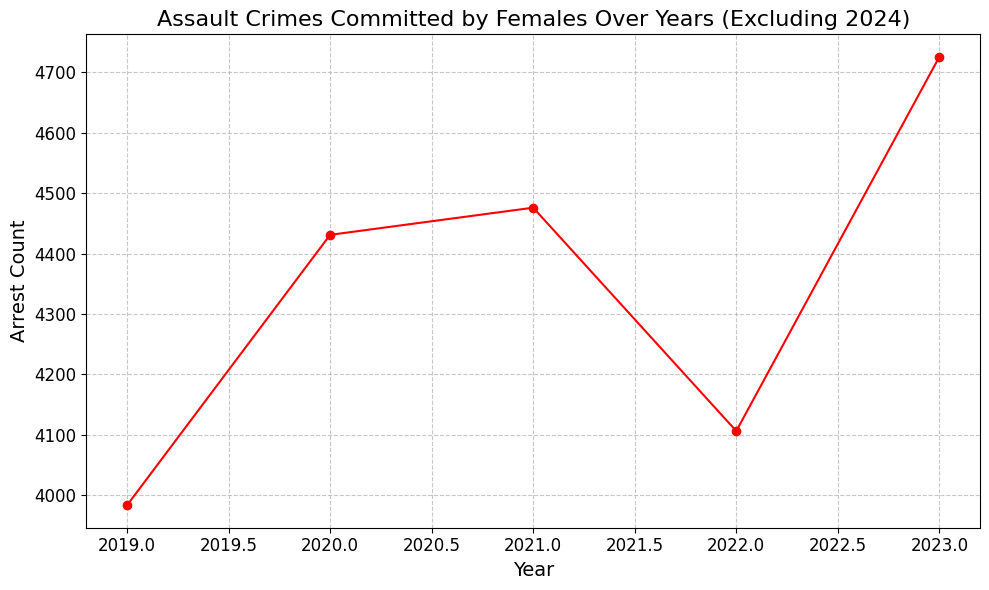

In [26]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Assault")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_murders = arrests_per_year.sum()
print(f"\nTotal count of assault related crimes committed by females (excluding 2024): {total_female_murders}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Assault Crimes Committed by Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

There is a big spike during 2022


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    428
2020    584
2021    596
2022    515
2023    472
Name: Arrest Count, dtype: int64

Total count of assault committed by asian females (excluding 2024): 2595


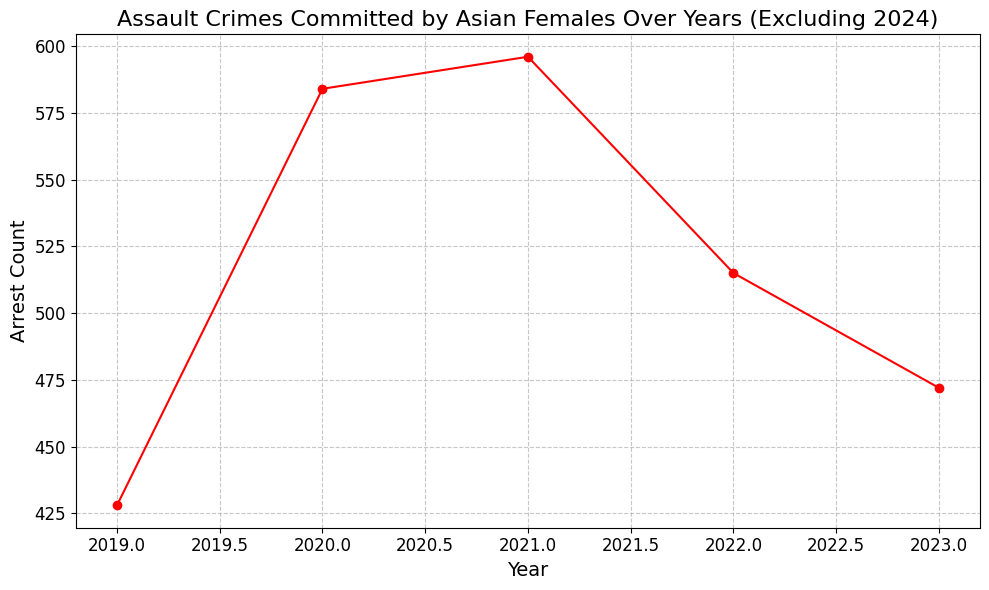

In [27]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Assault") & (df["Ethnicity (4+1)"] == "Asian")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_arrests = arrests_per_year.sum()
print(f"\nTotal count of assault committed by asian females (excluding 2024): {total_female_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Assault Crimes Committed by Asian Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    2161
2020    2395
2021    2428
2022    2090
2023    2079
Name: Arrest Count, dtype: int64

Total count of assault committed by white females (excluding 2024): 11153


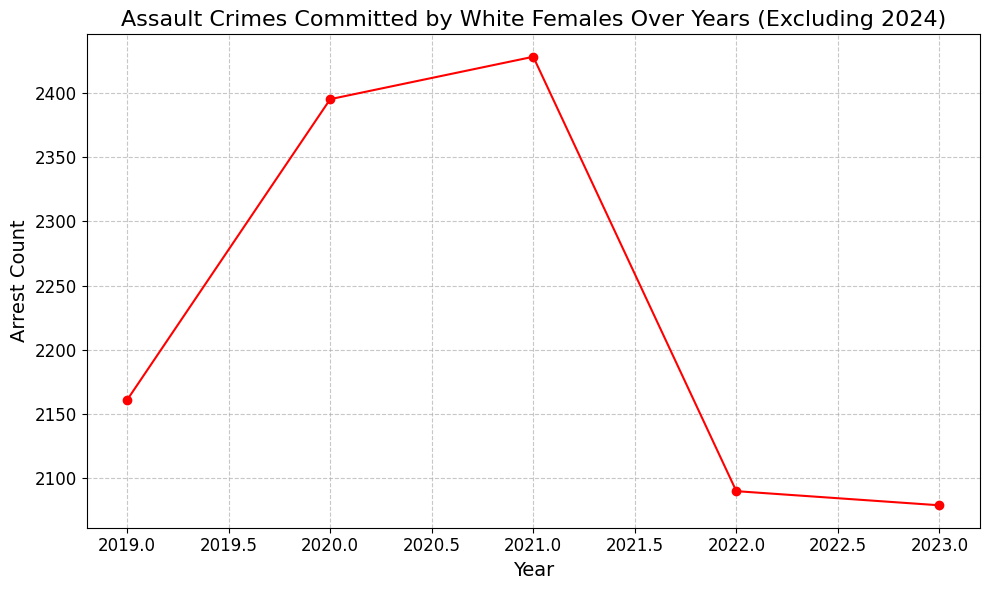

In [28]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Assault") & (df["Ethnicity (4+1)"] == "White")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_arrests = arrests_per_year.sum()
print(f"\nTotal count of assault committed by white females (excluding 2024): {total_female_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Assault Crimes Committed by White Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    1292
2020    1294
2021    1301
2022    1292
2023    1286
Name: Arrest Count, dtype: int64

Total count of assault committed by black females (excluding 2024): 6465


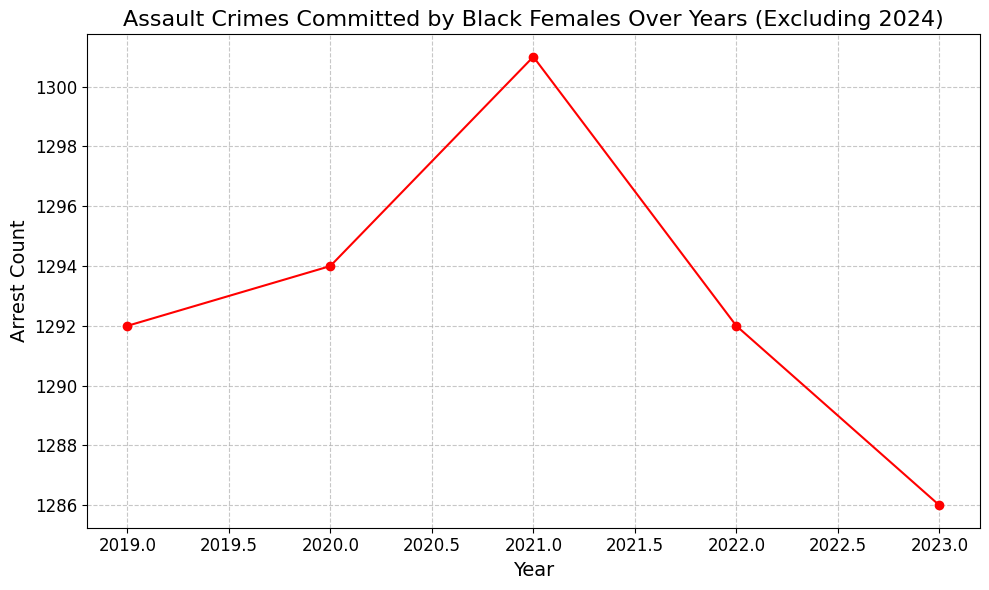

In [29]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Assault") & (df["Ethnicity (4+1)"] == "Black")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_arrests = arrests_per_year.sum()
print(f"\nTotal count of assault committed by black females (excluding 2024): {total_female_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Assault Crimes Committed by Black Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

We can see that there is a decline when looking into specific ethnicity's.

Lets look at the "Not Recorded" ethnicity


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019     35
2020     72
2021     63
2022    135
2023    820
Name: Arrest Count, dtype: int64

Total count of assault committed by not recorded females (excluding 2024): {total_female_arrests}


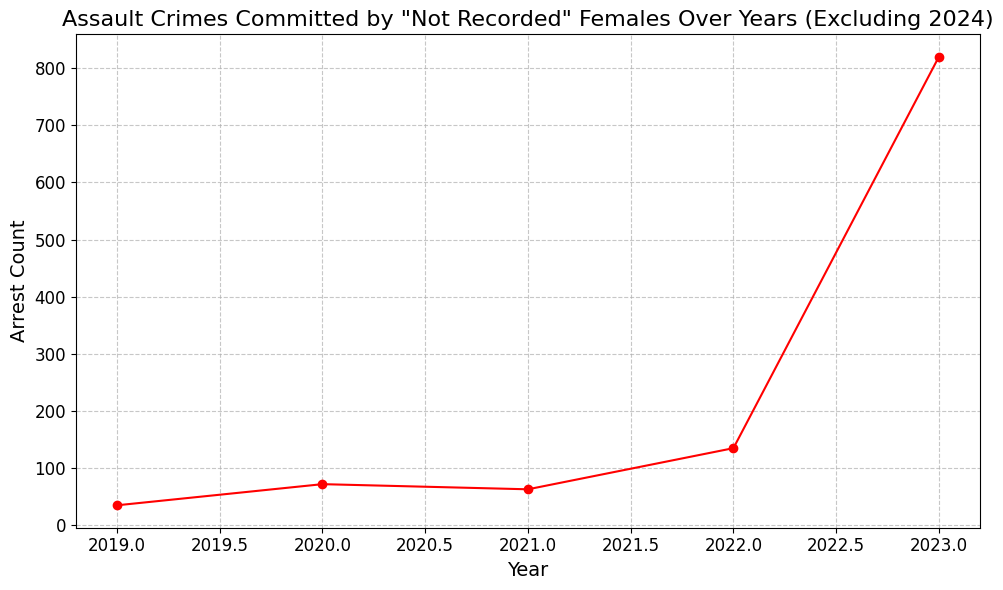

In [30]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Assault") & (df["Ethnicity (4+1)"] == "Not Recorded")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_arrests = arrests_per_year.sum()
print(f"\nTotal count of assault committed by ""not recorded"" females (excluding 2024): {total_female_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Assault Crimes Committed by "Not Recorded" Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

Now we see that there is a humongous spike up when looking at the not recorded ethnicity's.

Now lets take a look at the Burglary crimes committed by females


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    385
2020    350
2021    321
2022    368
2023    400
Name: Arrest Count, dtype: int64

Total count of Burglary related crimes committed by females (excluding 2024): 1824


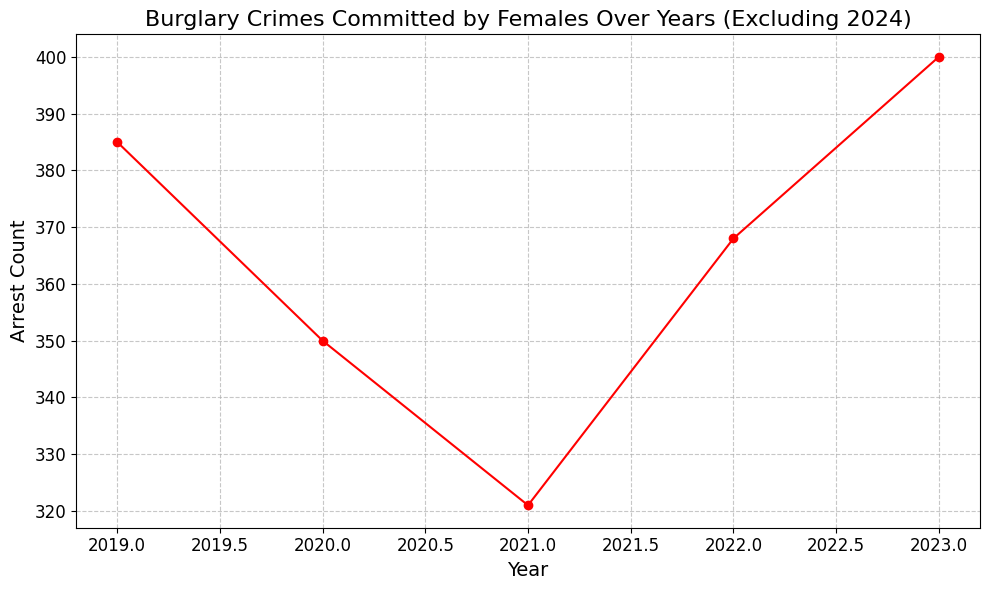

In [31]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Burglary")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_murders = arrests_per_year.sum()
print(f"\nTotal count of Burglary related crimes committed by females (excluding 2024): {total_female_murders}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Burglary Crimes Committed by Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    18
2020    14
2021    11
2022    19
2023    15
Name: Arrest Count, dtype: int64

Total count of burglary committed by asian females (excluding 2024): 77


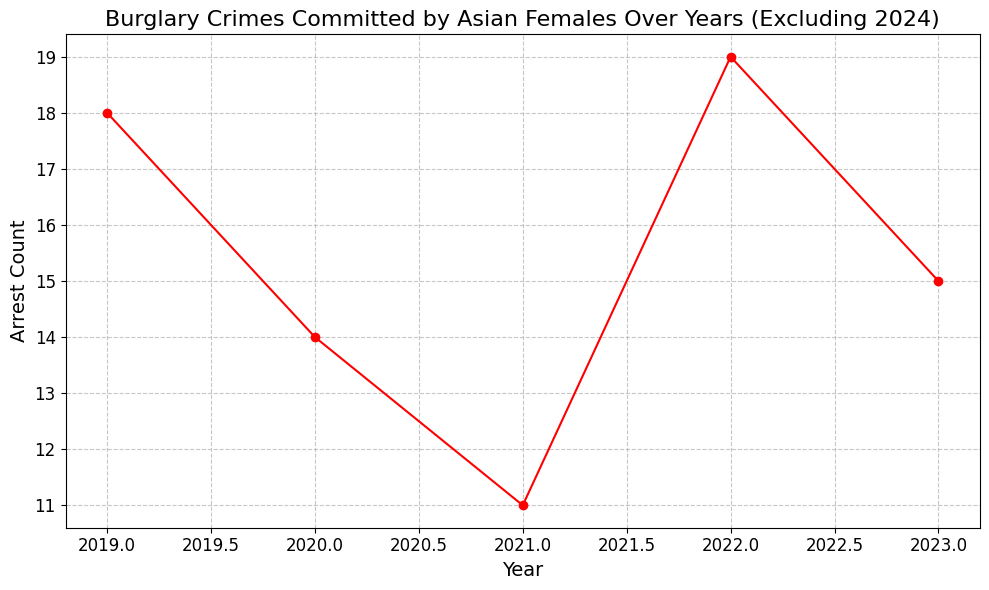

In [32]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Burglary") & (df["Ethnicity (4+1)"] == "Asian")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_arrests = arrests_per_year.sum()
print(f"\nTotal count of burglary committed by asian females (excluding 2024): {total_female_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Burglary Crimes Committed by Asian Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    269
2020    225
2021    187
2022    243
2023    254
Name: Arrest Count, dtype: int64

Total count of burglary committed by white females (excluding 2024): 1178


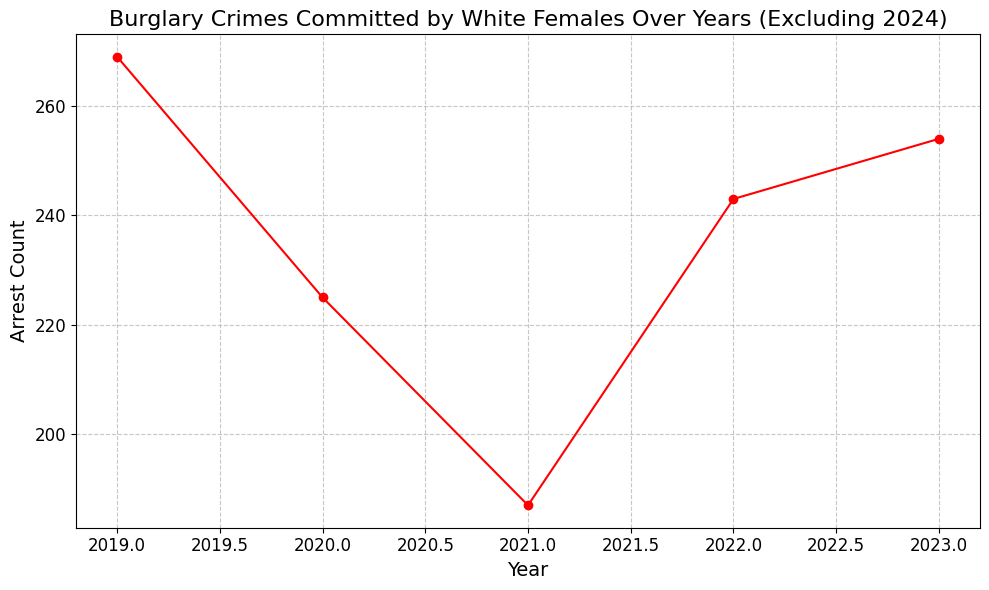

In [33]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Burglary") & (df["Ethnicity (4+1)"] == "White")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_arrests = arrests_per_year.sum()
print(f"\nTotal count of burglary committed by white females (excluding 2024): {total_female_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Burglary Crimes Committed by White Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019     90
2020     97
2021    110
2022     93
2023     99
Name: Arrest Count, dtype: int64

Total count of burglary committed by black females (excluding 2024): 489


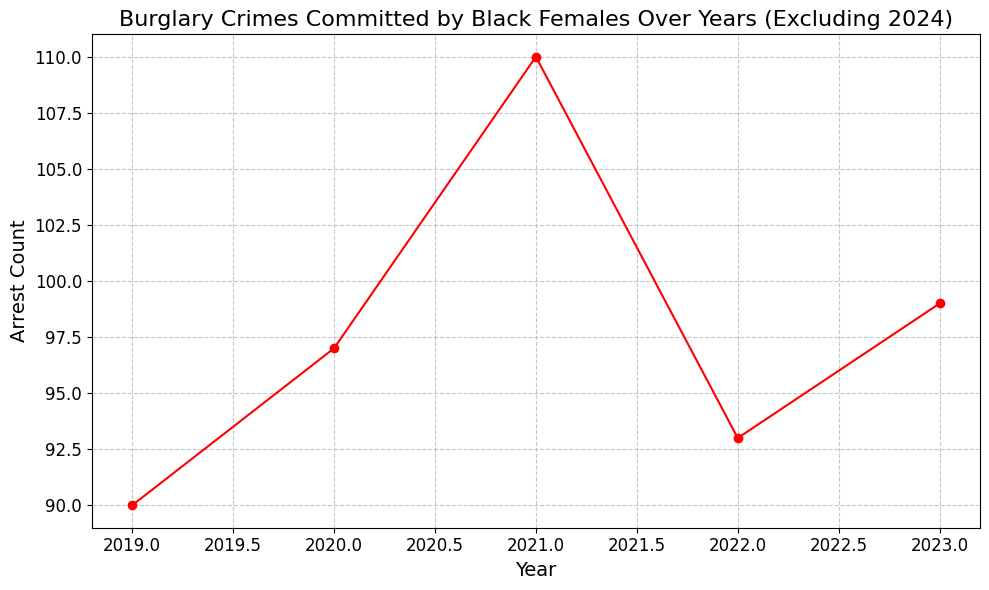

In [34]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Burglary") & (df["Ethnicity (4+1)"] == "Black")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_arrests = arrests_per_year.sum()
print(f"\nTotal count of burglary committed by black females (excluding 2024): {total_female_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Burglary Crimes Committed by Black Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

We can evaluate that there are similarities between the "Asian" and "White" graphs, the "Black" ethnicity graph is the complete opposite of the other two graphs


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    223
2020    151
2021    139
2022    169
2023    338
Name: Arrest Count, dtype: int64

Total count of Immigration related crimes committed by females (excluding 2024): 1020


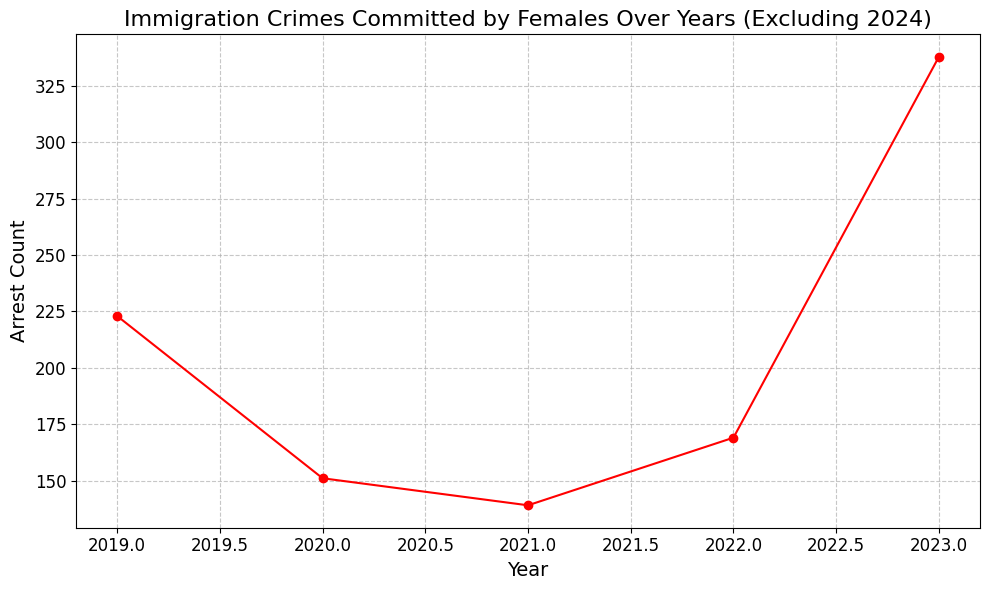

In [35]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Immigration")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_murders = arrests_per_year.sum()
print(f"\nTotal count of Immigration related crimes committed by females (excluding 2024): {total_female_murders}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Immigration Crimes Committed by Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    96
2020    54
2021    48
2022    45
2023    41
Name: Arrest Count, dtype: int64

Total count of Immigration committed by asian females (excluding 2024): 284


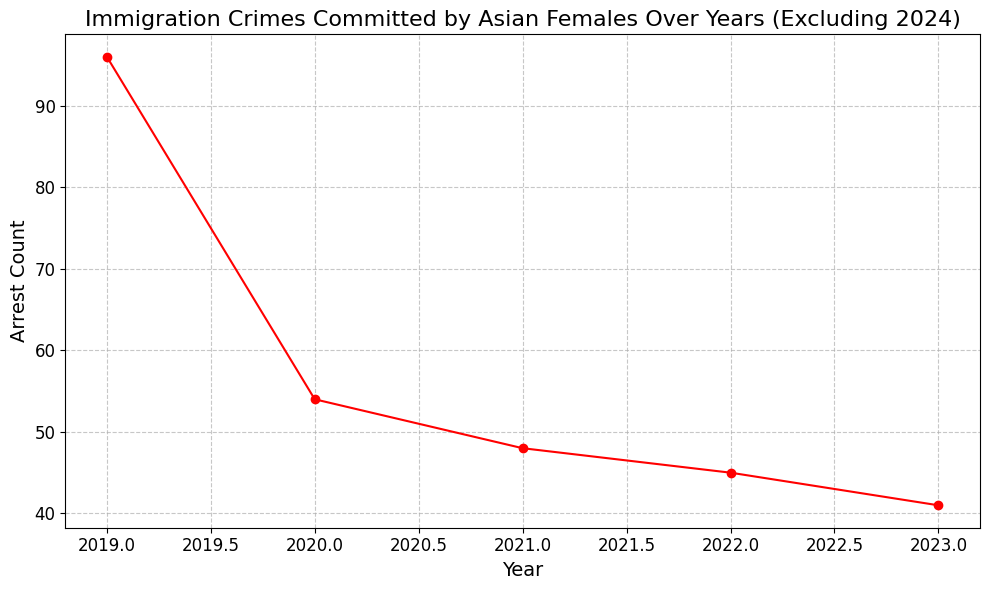

In [39]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Immigration") & (df["Ethnicity (4+1)"] == "Asian")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_arrests = arrests_per_year.sum()
print(f"\nTotal count of Immigration committed by asian females (excluding 2024): {total_female_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Immigration Crimes Committed by Asian Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019     43
2020     50
2021     44
2022     83
2023    138
Name: Arrest Count, dtype: int64

Total count of Immigration committed by white females (excluding 2024): 358


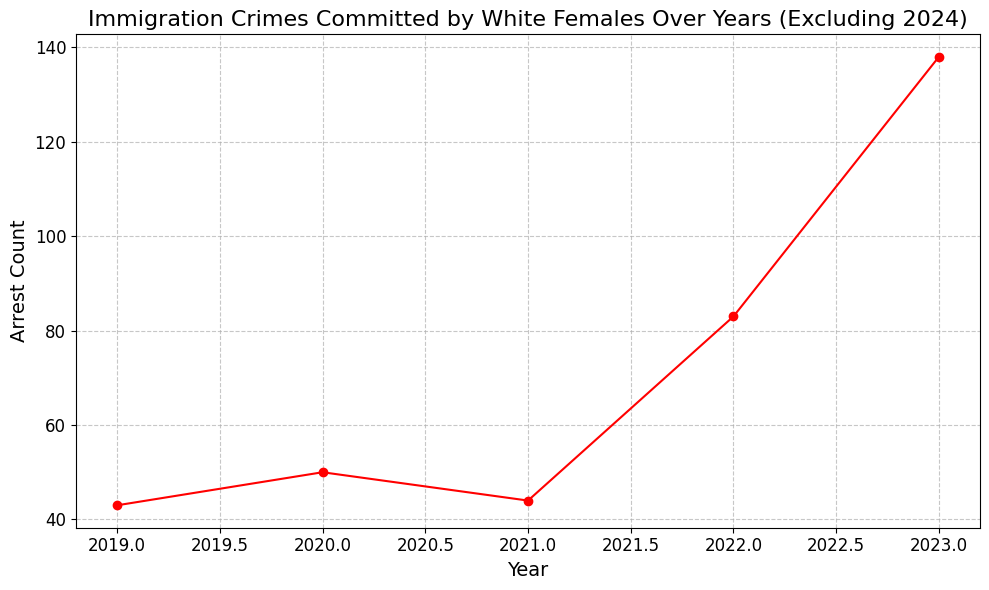

In [40]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Immigration") & (df["Ethnicity (4+1)"] == "White")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_arrests = arrests_per_year.sum()
print(f"\nTotal count of Immigration committed by white females (excluding 2024): {total_female_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Immigration Crimes Committed by White Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    62
2020    37
2021    36
2022    26
2023    30
Name: Arrest Count, dtype: int64

Total count of Immigration committed by black females (excluding 2024): 191


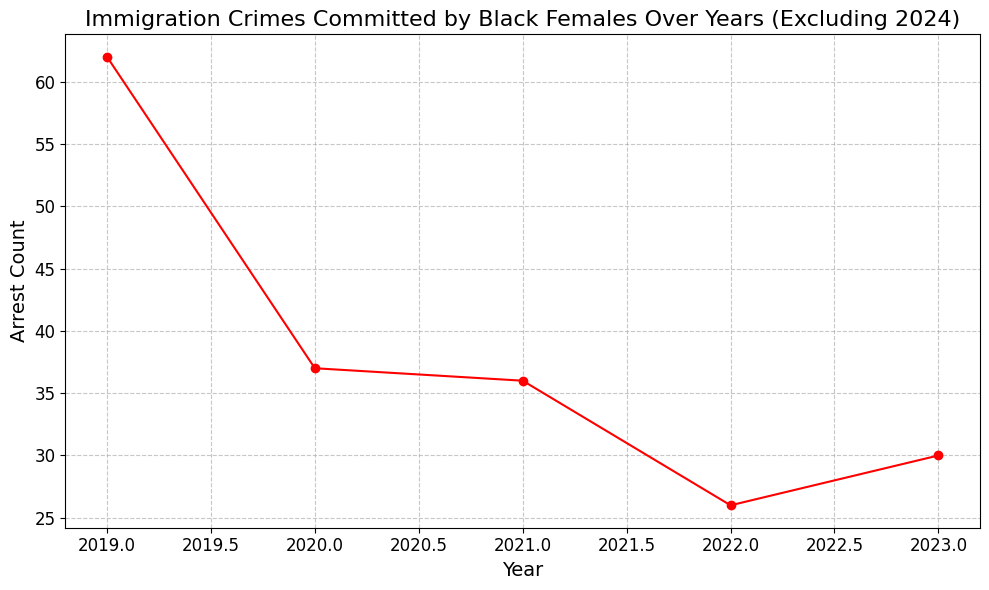

In [41]:
df_filtered = df[(df['Gender'] == "Female") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Immigration") & (df["Ethnicity (4+1)"] == "Black")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_female_arrests = arrests_per_year.sum()
print(f"\nTotal count of Immigration committed by black females (excluding 2024): {total_female_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Immigration Crimes Committed by Black Females Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

Here we can see that Asian and Black ethnicity females immigration crimes are on the decline, however, White ethnicity females immigration crimes are on a uptrend


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    2657
2020    3102
2021    3230
2022    3060
2023     567
Name: Arrest Count, dtype: int64

Total count of murders committed by females (excluding 2024): 12616


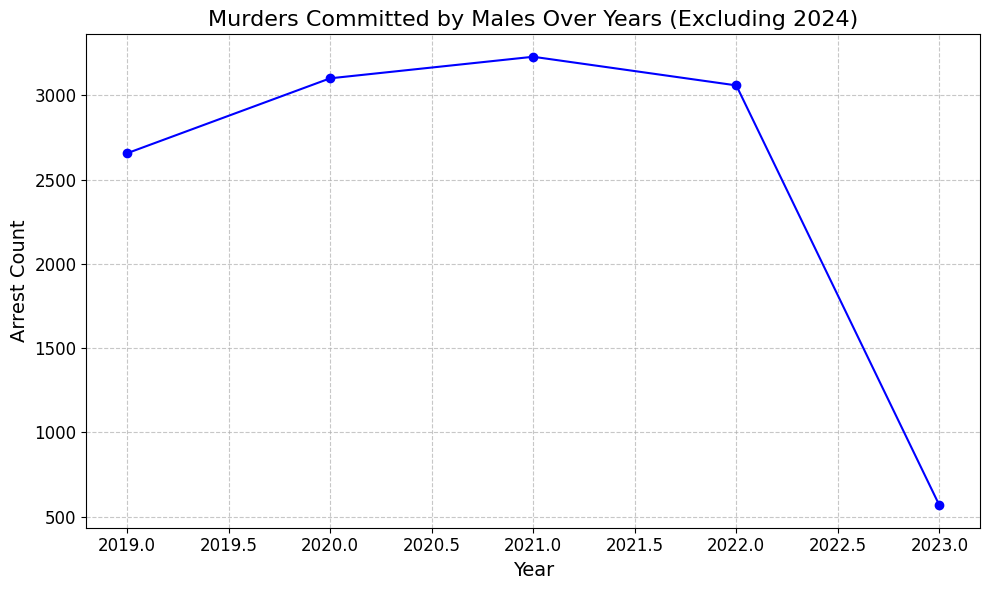

In [43]:
df_filtered = df[(df['Gender'] == "Male") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Murder")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_arrests = arrests_per_year.sum()
print(f"\nTotal count of murders committed by females (excluding 2024): {total_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="b")

plt.title('Murders Committed by Males Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    527
2020    621
2021    698
2022    610
2023     45
Name: Arrest Count, dtype: int64

Total count of Murder committed by asian males (excluding 2024): 2501


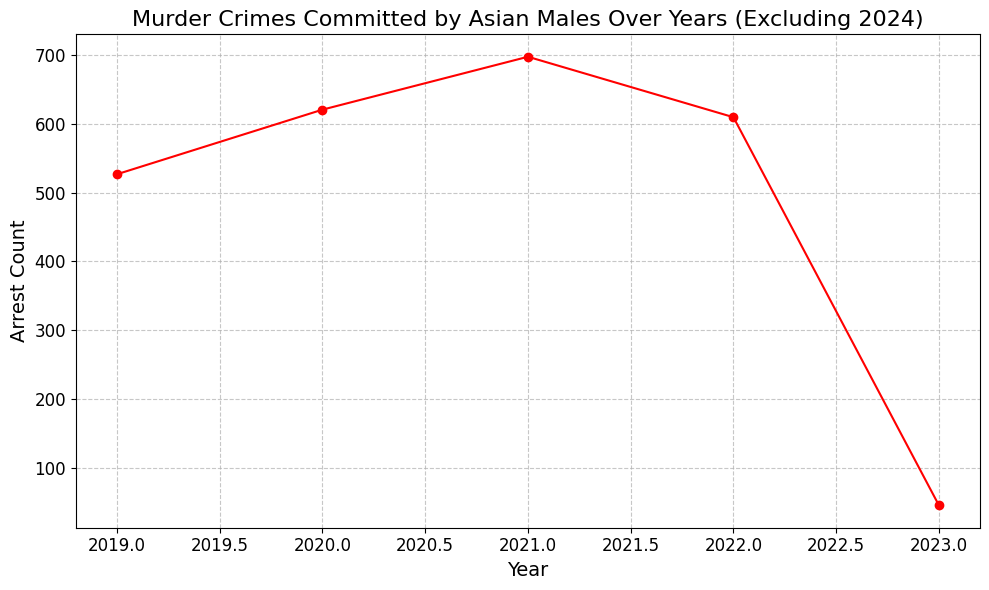

In [44]:
df_filtered = df[(df['Gender'] == "Male") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Murder") & (df["Ethnicity (4+1)"] == "Asian")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_arrests = arrests_per_year.sum()
print(f"\nTotal count of Murder committed by asian males (excluding 2024): {total_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Murder Crimes Committed by Asian Males Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019    1054
2020    1236
2021    1291
2022    1219
2023     154
Name: Arrest Count, dtype: int64

Total count of Murder committed by white males (excluding 2024): 4954


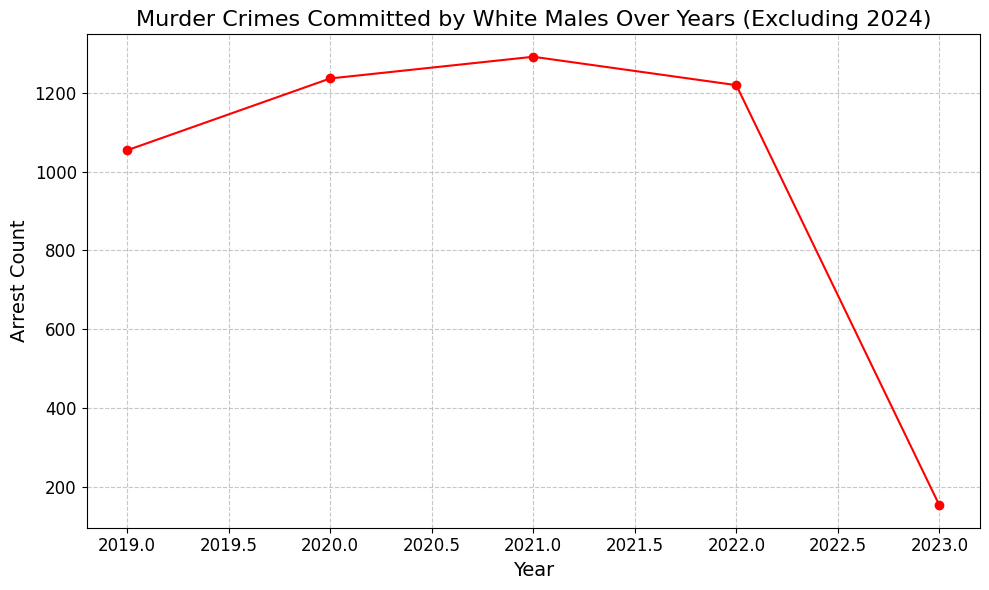

In [45]:
df_filtered = df[(df['Gender'] == "Male") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Murder") & (df["Ethnicity (4+1)"] == "White")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_arrests = arrests_per_year.sum()
print(f"\nTotal count of Murder committed by white males (excluding 2024): {total_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Murder Crimes Committed by White Males Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()


Grouped Data (Sum of Arrest Counts per Year):
Arrest Year
2019     928
2020    1060
2021    1035
2022    1008
2023     309
Name: Arrest Count, dtype: int64

Total count of Murder committed by black males (excluding 2024): 4340


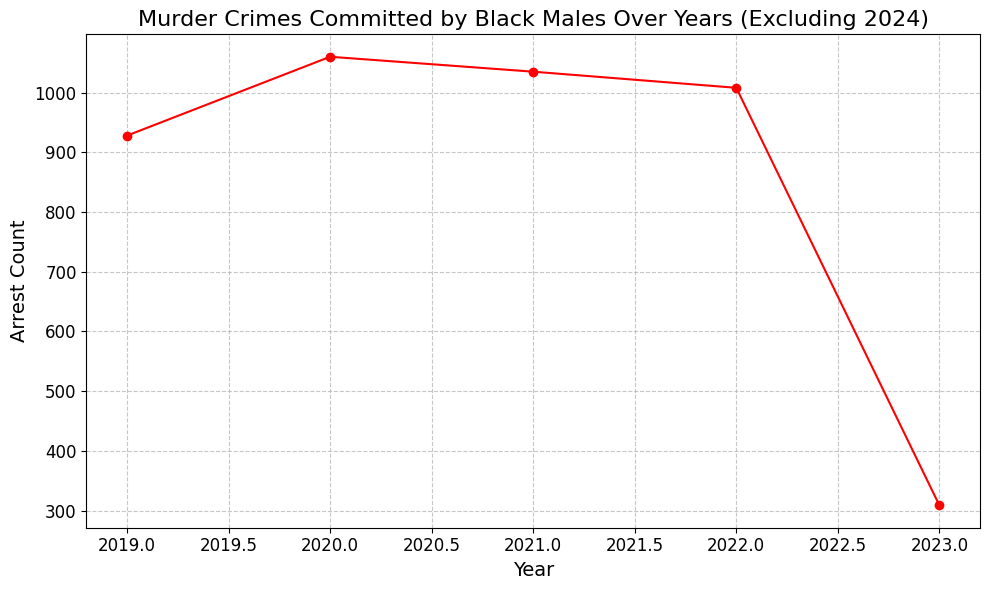

In [46]:
df_filtered = df[(df['Gender'] == "Male") & (df["Arrest Year"] != 2024) & (df["First Arrest Offnece"] == "Murder") & (df["Ethnicity (4+1)"] == "Black")]

arrests_per_year = df_filtered.groupby('Arrest Year')['Arrest Count'].sum()

print("\nGrouped Data (Sum of Arrest Counts per Year):")
print(arrests_per_year)

total_arrests = arrests_per_year.sum()
print(f"\nTotal count of Murder committed by black males (excluding 2024): {total_arrests}")

plt.figure(figsize=(10, 6))
plt.plot(arrests_per_year.index, arrests_per_year.values, marker='o', linestyle='-', color="r")

plt.title('Murder Crimes Committed by Black Males Over Years (Excluding 2024)', fontsize=16) 
plt.xlabel('Year', fontsize=14)  
plt.ylabel('Arrest Count', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show()

Discussion about male murder rates. Calculate the differences in percentages between each year. Do this for all graphs